In [1]:
#Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'




In [2]:
url = "https://www.fantasyfootballdatapros.com/api/players/"
years = list(range(2010, 2020))

player_name = []
position = []
season = []
games_played = []
fumbles = []
interceptions = []
passing_yds = []
receptions = []
receiving_yds = []
rushing_yds = []
passing_tds = []
rushing_tds = []
receiving_tds = []
team = []

#fantasy = requests.get(url + '2019/all').json()
#print(json.dumps(fantasy, indent=4, sort_keys=True))

for year in years:
    query_url = url + str(year) + '/all'
    fantasy = requests.get(query_url).json()
    number_of_players = len(fantasy)
    
    for x in range(number_of_players):
        player_name.append(fantasy[x]['player_name'])
        team.append(fantasy[x]['team'])
        position.append(fantasy[x]['position'])
        season.append(year)
        games_played.append(fantasy[x]['games_played'])
        fumbles.append(fantasy[x]['fumbles_lost'])
        interceptions.append(fantasy[x]['stats']['passing']['int'])
        passing_yds.append(fantasy[x]['stats']['passing']['passing_yds'])
        passing_tds.append(fantasy[x]['stats']['passing']['passing_td'])
        rushing_yds.append(fantasy[x]['stats']['rushing']['rushing_yds'])
        rushing_tds.append(fantasy[x]['stats']['rushing']['rushing_td'])
        receptions.append(fantasy[x]['stats']['receiving']['receptions'])
        receiving_yds.append(fantasy[x]['stats']['receiving']['receiving_yds'])
        receiving_tds.append(fantasy[x]['stats']['receiving']['receiving_td'])
    
player_dict = {
    'Player Name' : player_name,
    'Team': team,
    'Position': position,
    'Season': season,
    'Games Played': games_played,
    'Fumbles': fumbles,
    'Interceptions': interceptions,
    'Passing Yards': passing_yds,
    'Passing TDs':passing_tds,
    'Rushing Yards':rushing_yds,
    'Rushing TDs':rushing_tds,
    'Receptions':receptions,
    'Receiving Yards':receiving_yds,
    'Receiving TDs':receiving_tds
}
    
players = pd.DataFrame(player_dict)


#Calculating Season point totals
players['Half PPR Points Season Total'] = (
    (players['Passing Yards']*0.04) + (players['Passing TDs'] * 4) - (players['Interceptions'] * 2)+
    (players['Rushing Yards']*.1) + (players['Rushing TDs'] * 6) - (players['Fumbles'] * 2) + 
    (players['Receptions'] * 0.5) + (players['Receiving Yards'] * .1) + (players['Receiving TDs'] * 6)
    )






In [3]:
#Breaking up dataframe into smaller dataframes of individual positions
qb_data = players[players['Position'] == 'QB']
rb_data = players[players['Position'] == 'RB']
wr_data = players[players['Position'] == 'WR']
te_data = players[players['Position'] == 'TE']

#list of position dataframes for for loops below
data_list = [qb_data, rb_data, wr_data, te_data]


#Dictionaries that will be used to store total points for top ranked players at each position over the years
qb_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
}

rb_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
    13 : 0,
    14 : 0,
    15 : 0,
    16 : 0,
    17 : 0, 
    18 : 0,
    19 : 0,
    20 : 0,
    21 : 0,
    22 : 0,
    23 : 0,
    24 : 0   
}

wr_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
    13 : 0,
    14 : 0,
    15 : 0,
    16 : 0,
    17 : 0, 
    18 : 0,
    19 : 0,
    20 : 0,
    21 : 0,
    22 : 0,
    23 : 0,
    24 : 0
    
}

te_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,  
}

#list of dictionaries to be used in for loop
positions = [qb_rank_points, rb_rank_points, wr_rank_points, te_rank_points]

#for loop that will go through every year, then go through qb, rb, wr, and te to
#sort by the most total season points scored

for year in years:
    for x in range(4):
        temp_df = data_list[x][data_list[x]['Season'] == year]
        temp_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
        temp_df.reset_index(inplace = True, drop = True)
        
#This section below takes the number 1-12 or 1-24 of each position for every year and sums 
# all the number 1 ranked scores, the number 2 ranked scores, etc., leaving the totals in the
# dictionaries created earlier

        for y in range(1, 25):
            if y in positions[x]:
                positions[x][y] += temp_df._get_value(y - 1, 'Half PPR Points Season Total')

#This for loop takes the total sum of each rank and averages it, dividing by 10 because there are 10 years of data

for x in range(4):
    for y in range(1, 25):
        if y in positions[x]:
            positions[x][y] = positions[x][y] / 10
            



([<matplotlib.axis.XTick at 0x7fa90b8eca30>,
 <a list of 12 Text major ticklabel objects>)

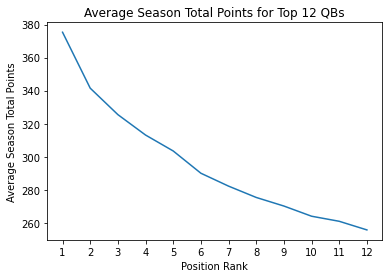

In [4]:
qb_ranks = pd.DataFrame(qb_rank_points, index=[0])

qb_ranks = qb_ranks.transpose()
qb_ranks

plt.plot(qb_ranks)
plt.ylabel('Average Season Total Points')
plt.xlabel('Position Rank')
plt.title('Average Season Total Points for Top 12 QBs')
plt.xticks(np.arange(1, 13, step=1))

In [5]:
#Rookie Lists 
#(pull these names from the data frame above 
#by each year and compare to the minimum highest startable score for each position
#QB/TE > 12 , RB/WR > 24

#QB 
qb2019 = ["Kyler Murray", "Daniel Jones", "Dwayne Haskins", "Drew Lock", "Will Grier"]
qb2018 = ["Baker Mayfield", "Sam Darnold", "Josh Allen", "Josh Rosen", "Lamar Jackson"]
qb2017 = ["Mitchell Trubisky", "Patrick Mahomes", "Deshaun Watson", "DeShone Kizer", "Davis Webb"]
qb2016 = ["Jared Goff", "Carson Wentz", "Paxton Lynch", "Christian Hackenberg", "Jacoby Brissett"]
qb2015 = ["Jameis Winston", "Marcus Mariota", "Garrett Grayson", "Sean Mannion", "Bryce Petty"]

#RB
rb2019 = ["Josh Jacobs", "Miles Sanders", "Darrell Henderson", "David Montgomery", "Devin Singletary"]
rb2018 = ["Saquon Barkley", "Rashaad Penny", "Sony Michel", "Nick Chubb", "Ronald Jones"]
rb2017 = ['Leonard Fournette', 'Christian McCaffrey', 'Dalvin Cook', 'Joe Mixon', 'Alvin Kamara']
rb2016 = ['Ezekiel Elliott', 'Derrick Henry', 'Kenyan Drake', 'C.J. Prosise', 'Tyler Ervin']
rb2015 = ['Todd Gurley', 'Melvin Gordon', 'T.J. Yeldon', 'Ameer Abdullah', 'Tevin Coleman']

#WR
wr2019 = ["Marquise Brown", "N'Keal Harry", "Deebo Samuel", "A.J. Brown", "	Mecole Hardman"]
wr2018 = ["D.J. Moore", "Calvin Ridley","Courtland Sutton", "Dante Pettis", "Christian Kirk"]
wr2017 = ["Corey Davis", "Mike Williams","John Ross", "Zay Jones", "Curtis Samuel"]
wr2016 = ["Corey Coleman", "Will Fuller", "Josh Doctson","Laquon Treadwell", "Sterling Shepard"]
wr2015 = ["Amari Cooper", "Kevin White", "DeVante Parker", "Nelson Agholor", "Breshad Perriman"]

#TE
te2019 = ["T.J. Hockenson", "Noah Fant", "Irv Smith Jr.", "Drew Sample", "Josh Oliver"]
te2018 = ["Hayden Hurst", "Mike Gesicki", "Dallas Goedert", "Mark Andrews", "Jordan Akins"]
te2017 = ["O.J. Howard", "Evan Engram", "David Njoku", "Gerald Everett", "Adam Shaheen"]
te2016 = ["Hunter Henry", "Austin Hooper", "Nick Vannett", "Tyler Higbee", "Seth Devalve"]
te2015 = ["Maxx Williams", "Clive Walford", "Tyler Kroft", "Jeff Heuerman", "Blake Bell"]

In [6]:
#sort dataset by top ten QB to see the players and  their points
qb_rookie = qb_data.sort_values(['Half PPR Points Season Total']).groupby(['Season']).tail(10)
qb_rookie.loc[qb_rookie['Season']==2019].sort_values(['Half PPR Points Season Total'], ascending=False)

,Player Name,Team,Position,Season,Games Played,Fumbles,Interceptions,Passing Yards,Passing TDs,Rushing Yards,Rushing TDs,Receptions,Receiving Yards,Receiving TDs,Half PPR Points Season Total
5533,Lamar Jackson,BAL,QB,2019,15.0,2.0,6.0,3127.0,36.0,1206.0,7.0,0.0,0.0,0.0,415.68
5543,Dak Prescott,DAL,QB,2019,16.0,2.0,11.0,4902.0,30.0,277.0,3.0,0.0,0.0,0.0,335.78
5545,Russell Wilson,SEA,QB,2019,16.0,2.0,5.0,4110.0,31.0,342.0,3.0,0.0,0.0,0.0,326.60
5548,Deshaun Watson,HOU,QB,2019,15.0,3.0,12.0,3852.0,26.0,413.0,7.0,1.0,6.0,1.0,318.48
5561,Jameis Winston,TAM,QB,2019,16.0,5.0,30.0,5109.0,33.0,250.0,1.0,0.0,0.0,0.0,297.36
5579,Patrick Mahomes,KAN,QB,2019,14.0,2.0,5.0,4031.0,26.0,218.0,2.0,0.0,0.0,0.0,285.04
5575,Josh Allen,BUF,QB,2019,16.0,4.0,9.0,3089.0,20.0,510.0,9.0,0.0,0.0,0.0,282.56
5581,Kyler Murray,ARI,QB,2019,16.0,2.0,12.0,3722.0,20.0,544.0,4.0,0.0,0.0,0.0,279.28
5587,Aaron Rodgers,GNB,QB,2019,16.0,4.0,4.0,4002.0,26.0,183.0,1.0,0.0,0.0,0.0,272.38
5591,Carson Wentz,PHI,QB,2019,16.0,7.0,7.0,4039.0,27.0,243.0,1.0,0.0,0.0,0.0,271.86


In [7]:
#Create a dictionary that will be used to store all the QB rookie names and their respective seasons to go through a for loop
qb_rookie_dict = {
    2015: qb2015,
    2016: qb2016,
    2017: qb2017,
    2018: qb2018,
    2019: qb2019
}

In [8]:
#Create a list of dictionaries with the same keyes for each dictionary
#Create a for loop that will go through each season, then go through  the name of every QB rookie in the dictionary
#Create a dataframe from the list of dictionaries that will show if QB is in the top ten


in_top_ten = []
for year in qb_rookie_dict.keys():
    top_ten = list(qb_rookie.loc[qb_rookie['Season']==year]['Player Name'].unique())
    for qb_rook in qb_rookie_dict[year]:
        
        temp = {}
        temp['Season'] = year
        temp['Player Name'] = qb_rook
        temp['Position'] = 'QB'
        temp['In Top 10'] = bool(qb_rook in top_ten)
        
        in_top_ten.append(temp)

qb_rook_results_df = pd.DataFrame(in_top_ten)
qb_rook_results_df

,Season,Player Name,Position,In Top 10
0,2015,Jameis Winston,QB,False
1,2015,Marcus Mariota,QB,False
2,2015,Garrett Grayson,QB,False
3,2015,Sean Mannion,QB,False
4,2015,Bryce Petty,QB,False
5,2016,Jared Goff,QB,False
6,2016,Carson Wentz,QB,False
7,2016,Paxton Lynch,QB,False
8,2016,Christian Hackenberg,QB,False
9,2016,Jacoby Brissett,QB,False


In [9]:
#sort dataset by top ten RB to see the players and  their points
rb_rookie = rb_data.sort_values(['Half PPR Points Season Total']).groupby(['Season']).tail(10)
rb_rookie.loc[rb_rookie['Season']==2019].sort_values(['Half PPR Points Season Total'], ascending=False)

,Player Name,Team,Position,Season,Games Played,Fumbles,Interceptions,Passing Yards,Passing TDs,Rushing Yards,Rushing TDs,Receptions,Receiving Yards,Receiving TDs,Half PPR Points Season Total
5532,Christian McCaffrey,CAR,RB,2019,16.0,0.0,0.0,0.0,0.0,1387.0,15.0,116.0,1005.0,4.0,411.2
5535,Aaron Jones,GNB,RB,2019,16.0,2.0,0.0,0.0,0.0,1084.0,16.0,49.0,474.0,3.0,290.3
5534,Derrick Henry,TEN,RB,2019,15.0,3.0,0.0,0.0,0.0,1540.0,16.0,18.0,206.0,2.0,285.6
5536,Ezekiel Elliott,DAL,RB,2019,16.0,2.0,0.0,0.0,0.0,1357.0,12.0,54.0,420.0,2.0,284.7
5537,Dalvin Cook,MIN,RB,2019,14.0,2.0,0.0,0.0,0.0,1135.0,13.0,53.0,519.0,0.0,265.9
5541,Austin Ekeler,LAC,RB,2019,16.0,2.0,0.0,0.0,0.0,557.0,3.0,92.0,993.0,8.0,263.0
5540,Nick Chubb,CLE,RB,2019,16.0,3.0,0.0,0.0,0.0,1494.0,8.0,36.0,278.0,0.0,237.2
5542,Mark Ingram,BAL,RB,2019,15.0,2.0,0.0,0.0,0.0,1018.0,10.0,26.0,247.0,5.0,225.5
5560,Leonard Fournette,JAX,RB,2019,15.0,1.0,0.0,0.0,0.0,1152.0,3.0,76.0,522.0,0.0,221.4
5552,Saquon Barkley,NYG,RB,2019,13.0,0.0,0.0,0.0,0.0,1003.0,6.0,52.0,438.0,2.0,218.1


In [10]:
#Create a dictionary that will be used to store all the RB rookie names and their respective seasons to go through a for loop
rb_rookie_dict = {
    2015: rb2015,
    2016: rb2016,
    2017: rb2017,
    2018: rb2018,
    2019: rb2019
}

In [11]:
#Create a list of dictionaries with the same keyes for each dictionary
#Create a for loop that will go through each season, then go through  the name of every QB rookie in the dictionary
#Create a dataframe from the list of dictionaries that will show if QB is in the top ten


in_top_ten = []
for year in rb_rookie_dict.keys():
    top_ten = list(rb_rookie.loc[rb_rookie['Season']==year]['Player Name'].unique())
    for rb_rook in rb_rookie_dict[year]:
        
        temp = {}
        temp['Season'] = year
        temp['Player Name'] = rb_rook
        temp['Position'] = 'RB'
        temp['In Top 10'] = bool(rb_rook in top_ten)
        
        in_top_ten.append(temp)

rb_rook_results_df = pd.DataFrame(in_top_ten)
rb_rook_results_df

,Season,Player Name,Position,In Top 10
0,2015,Todd Gurley,RB,True
1,2015,Melvin Gordon,RB,False
2,2015,T.J. Yeldon,RB,False
3,2015,Ameer Abdullah,RB,False
4,2015,Tevin Coleman,RB,False
5,2016,Ezekiel Elliott,RB,True
6,2016,Derrick Henry,RB,False
7,2016,Kenyan Drake,RB,False
8,2016,C.J. Prosise,RB,False
9,2016,Tyler Ervin,RB,False


In [12]:
#sort dataset by top ten WR to see the players and  their points
wr_rookie = wr_data.sort_values(['Half PPR Points Season Total']).groupby(['Season']).tail(10)
wr_rookie.loc[wr_rookie['Season']==2019].sort_values(['Half PPR Points Season Total'], ascending=False)

,Player Name,Team,Position,Season,Games Played,Fumbles,Interceptions,Passing Yards,Passing TDs,Rushing Yards,Rushing TDs,Receptions,Receiving Yards,Receiving TDs,Half PPR Points Season Total
5538,Michael Thomas,NOR,WR,2019,16.0,0.0,0.0,0.0,0.0,-9.0,0.0,149.0,1725.0,9.0,300.10
5546,Chris Godwin,TAM,WR,2019,14.0,0.0,0.0,0.0,0.0,8.0,0.0,86.0,1333.0,9.0,231.10
5558,Julio Jones,ATL,WR,2019,15.0,0.0,0.0,0.0,0.0,-3.0,0.0,99.0,1394.0,6.0,224.60
5557,Cooper Kupp,LAR,WR,2019,16.0,0.0,0.0,0.0,0.0,4.0,0.0,94.0,1161.0,10.0,223.50
5551,Kenny Golladay,DET,WR,2019,16.0,1.0,0.0,0.0,0.0,0.0,0.0,65.0,1190.0,11.0,215.50
5566,DeAndre Hopkins,HOU,WR,2019,15.0,0.0,1.0,6.0,1.0,18.0,0.0,104.0,1165.0,7.0,214.54
5559,DeVante Parker,MIA,WR,2019,16.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,1202.0,9.0,210.20
5568,Keenan Allen,LAC,WR,2019,16.0,0.0,0.0,0.0,0.0,16.0,0.0,104.0,1199.0,6.0,209.50
5563,Amari Cooper,DAL,WR,2019,16.0,0.0,0.0,0.0,0.0,6.0,0.0,79.0,1189.0,8.0,207.00
5570,Allen Robinson,CHI,WR,2019,16.0,0.0,0.0,0.0,0.0,2.0,0.0,98.0,1147.0,7.0,205.90


In [13]:
#Create a dictionary that will be used to store all the WR rookie names and their respective seasons to go through a for loop
wr_rookie_dict = {
    2015: rb2015,
    2016: rb2016,
    2017: rb2017,
    2018: rb2018,
    2019: rb2019
}

In [14]:
#Create a list of dictionaries with the same keyes for each dictionary
#Create a for loop that will go through each season, then go through  the name of every WR rookie in the dictionary
#Create a dataframe from the list of dictionaries that will show if QB is in the top ten


in_top_ten = []
for year in wr_rookie_dict.keys():
    top_ten = list(wr_rookie.loc[wr_rookie['Season']==year]['Player Name'].unique())
    for wr_rook in wr_rookie_dict[year]:
        
        temp = {}
        temp['Season'] = year
        temp['Player Name'] = wr_rook
        temp['Position'] = 'WR'
        temp['In Top 10'] = bool(wr_rook in top_ten)
        
        in_top_ten.append(temp)

wr_rook_results_df = pd.DataFrame(in_top_ten)
wr_rook_results_df

,Season,Player Name,Position,In Top 10
0,2015,Todd Gurley,WR,False
1,2015,Melvin Gordon,WR,False
2,2015,T.J. Yeldon,WR,False
3,2015,Ameer Abdullah,WR,False
4,2015,Tevin Coleman,WR,False
5,2016,Ezekiel Elliott,WR,False
6,2016,Derrick Henry,WR,False
7,2016,Kenyan Drake,WR,False
8,2016,C.J. Prosise,WR,False
9,2016,Tyler Ervin,WR,False
